In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [84]:
sns.set_style('dark', {'axes.grid':True, 'axes.edgecolor':'black', 'font.family':['serif'],'font.serif':['Roman'],
                       'xticks.bottom':True, 'ytick.left':True})

In [5]:
cwd = os.getcwd()
filename = cwd + '/winequality-red.csv'
data = pd.read_csv(filename)

In [10]:
print(data.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [18]:
# check if we have null values
print('Null values: ')
data.isnull().values.any()

Null values: 


False

In [17]:
values_counts=data['quality'].value_counts()
print("These are the observed values for " + 'quality' + ":")
print(values_counts)

These are the observed values for quality:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [22]:
# describe variables
data.loc[:, data.columns != 'quality'].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [26]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [72]:
# test and training data
X_data = data.loc[:, data.columns != 'quality']
y_data = data.loc[:, data.columns == 'quality']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2)

# for plotting correlation matrix
training_total = pd.concat([X_train, y_train], axis = 1)

(0, 12)

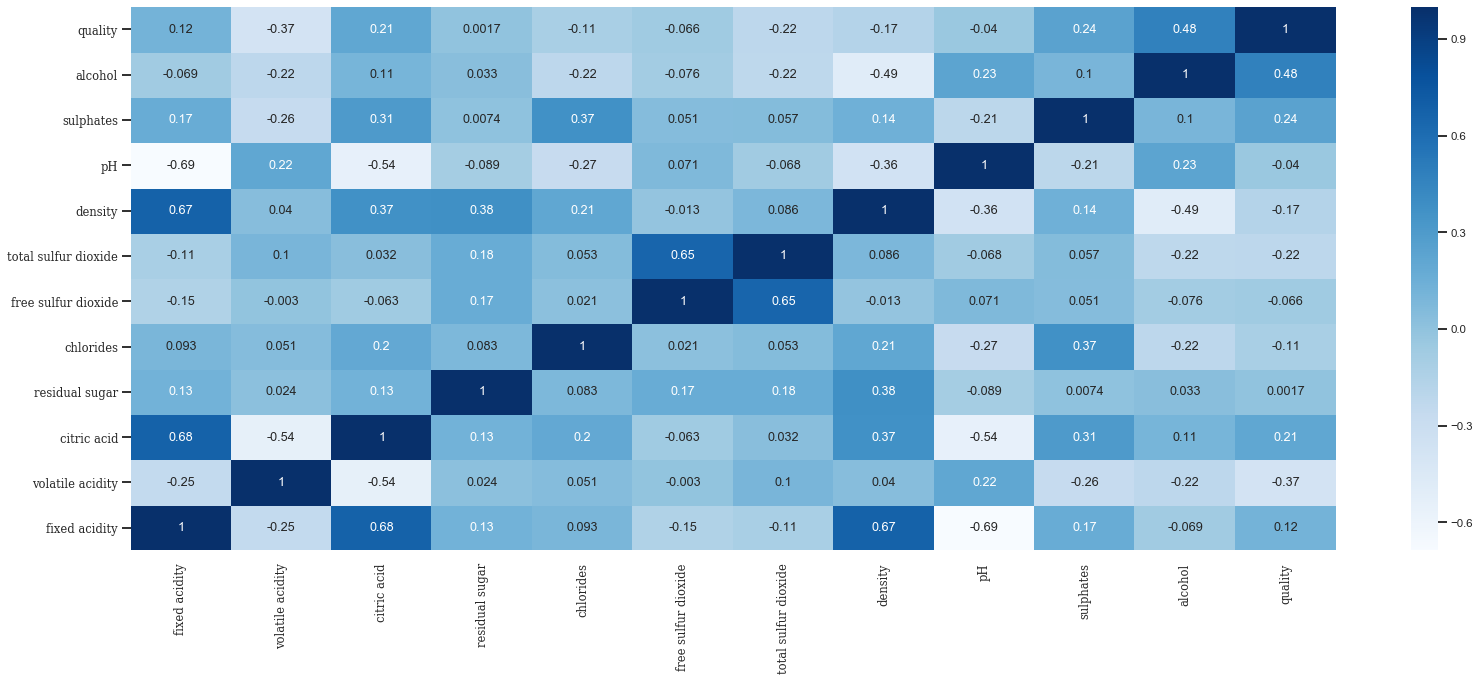

In [82]:
#CORRELATION MATRIX
fig1, ax1 = plt.subplots(figsize = (27,10))
sns.set()
sns.set_context("talk", font_scale=0.7)
sns.heatmap(training_total.loc[:,:].corr(), cmap='Blues', ax = ax1, annot=True)
plt.ylim(0,12)

PC       % Variance
1        94.4924 
2        4.9801  
3        0.2751  
4        0.156   
5        0.089   
6        0.0035  
7        0.002   
8        0.001   
9        0.0008  
10       0.0001  
11       0.0     


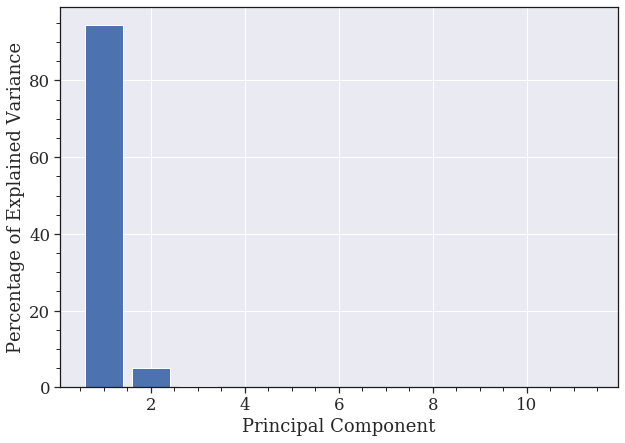

In [88]:
# PCA ANALYSIS
from sklearn.decomposition import PCA

pca100 = PCA()
pca100_X_train = pca100.fit_transform(X_train)
per_var = pca100.explained_variance_ratio_*100

fmt = '{:<8} {:<8}'
print(fmt.format('PC', '% Variance'))
for i in range(len(per_var)):
    print(fmt.format(i+1, np.round(per_var[i], decimals = 4)))

fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})
ax.bar(x=range(1,len(per_var)+1),height=per_var)
ax.set_ylabel("Percentage of Explained Variance")
ax.set_xlabel("Principal Component")
ax.minorticks_on()

In [106]:
# change to numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [105]:
# special one hot for y values
def to_categorical(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = 11
    onehot_vector = np.zeros((n_inputs, n_categories))
    for i in range(n_inputs):
        onehot_vector[i, integer_vector[i]] = 1    
    return onehot_vector

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [109]:
# Scale Data
trainScaler = StandardScaler()
trainScaler.fit(X_train)
X_train = trainScaler.transform(X_train)
X_test = trainScaler.transform(X_test)

Data now ready for analysis